<h1><center>Data Set Lokasi Mudik Karyawan TokoLapak</center></h1>

## Abstraksi

Idul Fitri di negara kita merupakan salah satu hari raya yang sangat penting, mengingat Indonesia merupakan negara dengan 87.2% populasi penduduknya beragama Islam. Sudah menjadi tradisi bahwa tiap tahun di hari-hari menjelang Idul Fitri, sebagian besar penduduk Indonesia yang merantau di kota besar seperti Jabodetabek mudik ke daerah asalnya masing-masing. Mereka mudik untuk mengunjungi sanak saudara dengan tujuan bersilaturahmi dan bermaaf-maafan. Khusus untuk penduduk Jabodetabek, perpindahan penduduk yang keluar dari Jabodetabek diperkirakan oleh Kemenhub sebanyak 15 juta orang. Kemudian, para pemudik yang sepekan Lebaran berada di kampung halaman pun mulai kembali ke ibu kota; dan kembali bekerja dan bergulat dengan kerasnya Jakarta. Diperkirakan sebanyak 71 ribu pendatang baru akan memasuki Jakarta.

Sumber: IDNTimes dan Detik

Asumsikan kamu merupakan Data Scientist departemen sumber daya manusia atau Human Resource Department (HRD) dari perusahaan yang bergerak di bidang marketplace bernama TokoLapak. Perusahaan ini memiliki karyawan yang tersebar di Jabodetabek (Jakarta, Kota Bogor, Kabupaten Bogor, Kota Depok, Kota Tangerang, Kota Tangerang Selatan, Kabupaten Tangerang, Kota Bekasi, dan Kabupaten Bekasi), dan setiap karyawan diwajibkan menginstall aplikasi TokoLapak, sehingga kamu memiliki sampel data dimana karyawan berada setiap harinya.

## Tujuan 

Menemukan Informasi-informasi yang berguna dari data.

## Mempersiapkan Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_lokasi = pd.read_csv('catatan_lokasi.csv')
df_profil_karyawan = pd.read_csv('data_profil.csv')

In [3]:
df_lokasi.head()

,id,tanggal,lokasi_dominan
0,1,21/05/19,Jakarta Pusat
1,2,21/05/19,Kabupaten Bogor
2,3,21/05/19,Jakarta Pusat
3,4,21/05/19,Kota Tangerang
4,5,21/05/19,Kota Bogor


Variabel pada data lokasi :
- id = id unik karyawan
- tanggal = tanggal pada hari tersebut
- lokasi_dominan = lokasi di mana karyawan tersebut berada di level kota/kabupaten
 

In [4]:
df_profil_karyawan.head()

,id,jenis_kelamin,divisi,umur
0,1,Laki-laki,Customer Service,34
1,2,Laki-laki,Data Engineer,26
2,3,Laki-laki,Software Engineer,28
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21


Variabel pada lokasi karyawan :
 - id = id unik karyawan
 - jenis_kelamin = jenis kelamin karyawan
 - Divisi = Divisi karyawan bekerja
 - umur = umur karyawan

In [5]:
df_lokasi.isnull().values.any()
#Memeriksa Missing value

False

In [6]:
df_profil_karyawan.isnull().values.any()
#Memeriksa Missing value

False

Data lokasi dan profil karyawan tidak memiliki data yang hilang atau kosong.

In [7]:
df_lokasi.shape

(2600, 3)

In [8]:
df_profil_karyawan.shape

(100, 4)

Data lokasi memiliki 2600 baris dan 3 kolom sedangkan profil karyawan memiliki 100 baris dan 4 kolom.

## Descriptive Analysis

In [9]:
df_profil_karyawan['umur'].describe()

count    100.000000
mean      27.660000
std        4.346646
min       21.000000
25%       24.000000
50%       27.000000
75%       32.000000
max       35.000000
Name: umur, dtype: float64

Berdasarkan data di atas karyawan termuda TokoLapak berumur 21 tahun , tertua 35 tahun dan rata-rata umur karyawan TokoLapak berusia 27 tahun.

In [10]:
df_profil_karyawan['divisi'].describe()

count                   100
unique                    6
top       Software Engineer
freq                     31
Name: divisi, dtype: object

Divisi Software Engineer TokoLapak sebagai divisi yang paling banyak karyawan sebanyak 31 orang.

In [11]:
df_profil_karyawan['jenis_kelamin'].value_counts()

Laki-laki    68
Perempuan    32
Name: jenis_kelamin, dtype: int64

Mayoritas karyawan TokoLapak adalah laki-laki dengan jumlah 68 orang dan karyawan perempuan 32 orang.

In [12]:
df_lokasi['lokasi_dominan'].describe()

count           2600
unique            28
top       Kota Depok
freq             177
Name: lokasi_dominan, dtype: object

Lokasi terbanyak dimana karyawan berada terdapat di level kota, kota Depok.

## Visualisasi Data Karyawan

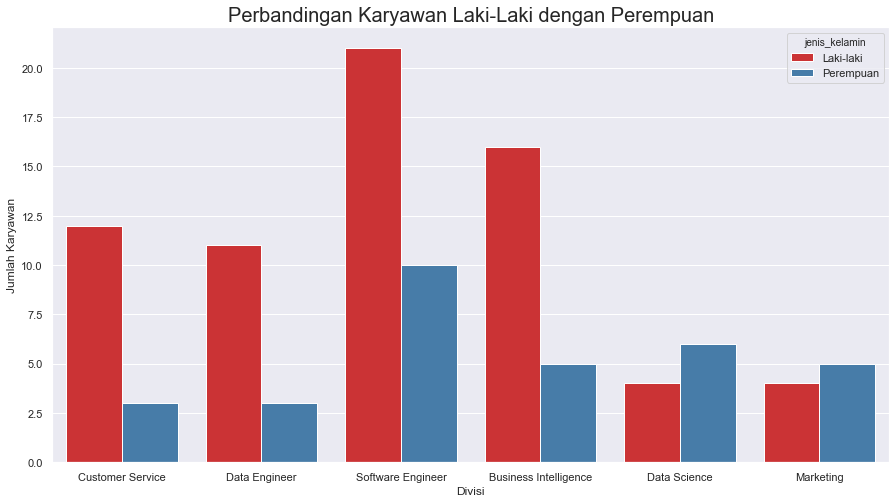

In [46]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x = 'divisi', data = df_profil_karyawan ,hue = 'jenis_kelamin', palette = "Set1")

plt.title('Perbandingan Karyawan Laki-Laki dengan Perempuan', fontsize='20')
plt.xlabel('Divisi')
plt.ylabel('Jumlah Karyawan')

plt.show()

Berdasarkan plot di atas :

- Mayoritas karyawan tiap divisi adalah laki-laki karena dari 6 divisi, 4 divisi di antaranya memiliki karyawan laki-laki lebih banyak.
- Divisi Software Enginner memiliki karyawan terbanyak baik laki-laki maupun perempuan.
- Divisi Data Science dan Marketing memiliki karyawan perempuan lebih banyak dari laki-laki.
- Jumlah karyawan perempuan paling sedikit berada pada divisi Customer Service dan Data Engineer

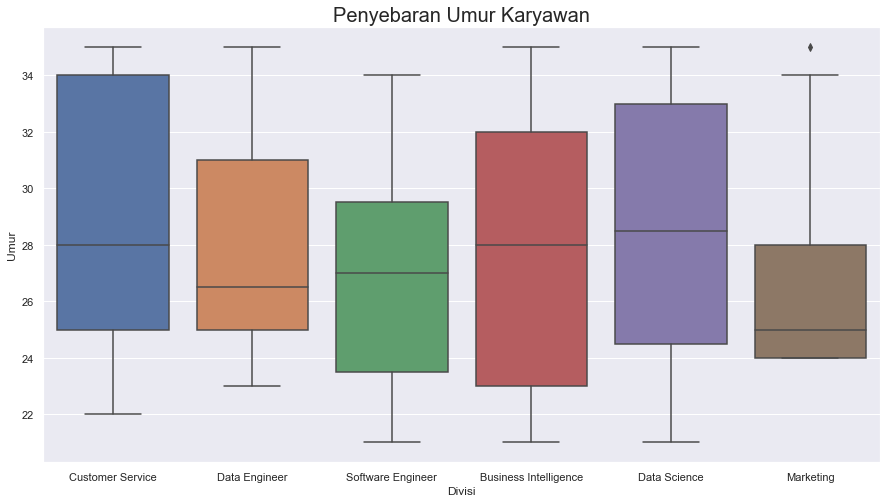

In [61]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="divisi", y="umur", data=df_profil_karyawan)

plt.title('Penyebaran Umur Karyawan', fontsize= '20')
plt.xlabel('Divisi')
plt.ylabel('Umur')

plt.show()

Dari box plot penyebaran umur karyawan di atas dapat diambil kesimpulan :

- Divisi yang memiliki karyawan relatif muda ada pada divisi marketing, software engineer, dan business intelligence.
- Divisi customer service memiliki banyak karyawan yang sudah berusia di atas 30 tahun.
- Divisi data science tergolong memiliki perbandingan umur yang seimbang.
- Karyawan termuda dengan umur 21 tahun berada di divisi software engineer, business intelligence, & data science.
- Karyawan tertua berada hampir di semua divisi kecuali pada divisi software engineer.

## Visualisasi Data Lokasi

In [50]:
df_lokasi['lokasi_dominan'].value_counts()

Kota Depok                   177
Kota Bekasi                  165
Jakarta Timur                163
Kota Bogor                   155
Jakarta Barat                155
Jakarta Pusat                145
Kota Tangerang               127
Kabupaten Bekasi             122
Kabupaten Sleman             120
Kota Yogyakarta              117
Kota Tangerang Selatan       116
Jakarta Selatan              105
Jakarta Utara                100
Kabupaten Bogor               98
Kota Medan                    85
Kota Padang                   81
Kabupaten Tangerang           79
Kabupaten Wonogiri            71
Kabupaten Bantul              68
Kabupaten Lampung Selatan     61
Kota Bandar Lampung           58
Kota Bandung                  54
Kota Surabaya                 52
Kota Semarang                 41
Kabupaten Tasikmalaya         35
Kota Manado                   33
Kota Banda Aceh               10
Kabupaten Kebumen              7
Name: lokasi_dominan, dtype: int64

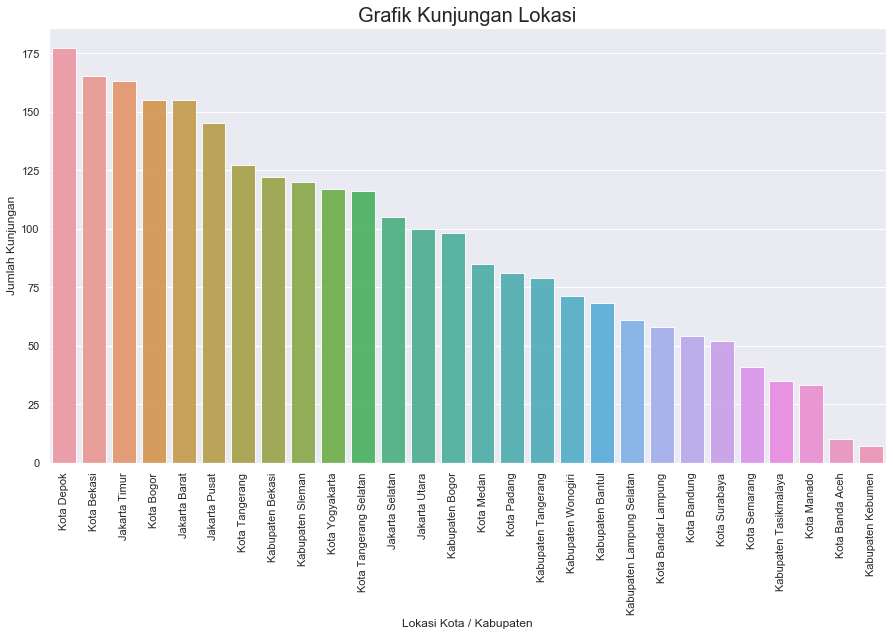

In [65]:
kunjungan_lokasi = df_lokasi['lokasi_dominan'].value_counts()

plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
sns.barplot(kunjungan_lokasi.index, kunjungan_lokasi.values, alpha=0.9)
plt.xticks(rotation=90)

plt.title('Grafik Kunjungan Lokasi', fontsize='20')
plt.xlabel('Lokasi Kota / Kabupaten')
plt.ylabel('Jumlah Kunjungan')

plt.show()

Grafik di atas menggambarkan jumlah kunjungan ke masing-masing kota atau kabupaten. 

Dari grafik di atas dapat diambil kesimpulan :
- Kota Depok dan Kota bekasi merupakan kota yang paling banyak dikunjungi.
- Kabupaten kebumen dan kota banda aceh sebagai kota dan kabupaten paling sedikit dikunjungi.
- Wilayah JABODETABEK menjadi wilayah yang lebih sering dikunjungi.

Untuk mengetahui kondisi wilayah JABODETABEK dan NON JABODETABEK , maka dilakukan sebuah 2 pembagian 2 wilayah tersebut.

In [73]:
# mengambil urutan tanggal
tanggal =  []
for t in df_lokasi["tanggal"]:
    if t not in tanggal: tanggal.append(t)

jabodetabek = ['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor', 
               'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan', 
               'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang', 'Kabupaten Bekasi', 
               'Kota Tangerang Selatan']

karyawanLuarKota = []
karyawanDalamKota = []

for t in tanggal:
    # menghitung karyawan yang pergi ke luar kota maupun tidak
    cntLK = cntDK = 0 
    
    for lokasi in df_lokasi.lokasi_dominan[df_lokasi["tanggal"] == t]:
        if lokasi in jabodetabek: cntDK += 1
        else: cntLK += 1
    
    karyawanLuarKota.append(cntLK)
    karyawanDalamKota.append(cntDK)

# menggabungkan beberapa DataFrame
df1 = pd.DataFrame(karyawanLuarKota, columns = ['Jumlah Di Luar Kota'])
df2 = pd.DataFrame(karyawanDalamKota, columns = ['Jumlah Di Dalam Kota'])
df3 = pd.DataFrame(tanggal, columns = ['Tanggal'])

data_jumlah = pd.merge(df1, df2, left_index = True, right_index= True)
data_jumlah = pd.merge(df3, data_jumlah, left_index = True, right_index= True)
print(data_jumlah)
print("------------------------------------------------------------")
print("Jumlah Karyawan di Luar Kota: " +str(data_jumlah['Jumlah Di Luar Kota'].sum()))
print("Jumlah Karyawan di Dalam Kota: " +str(data_jumlah['Jumlah Di Dalam Kota'].sum()))

     Tanggal  Jumlah Di Luar Kota  Jumlah Di Dalam Kota
0   21/05/19                    0                   100
1   22/05/19                    0                   100
2   23/05/19                    3                    97
3   24/05/19                    2                    98
4   25/05/19                    2                    98
5   26/05/19                    5                    95
6   27/05/19                    5                    95
7   28/05/19                    9                    91
8   29/05/19                   19                    81
9   30/05/19                   34                    66
10  31/05/19                   58                    42
11  01/06/19                   73                    27
12  02/06/19                   83                    17
13  03/06/19                   93                     7
14  04/06/19                   91                     9
15  05/06/19                   91                     9
16  06/06/19                   91               

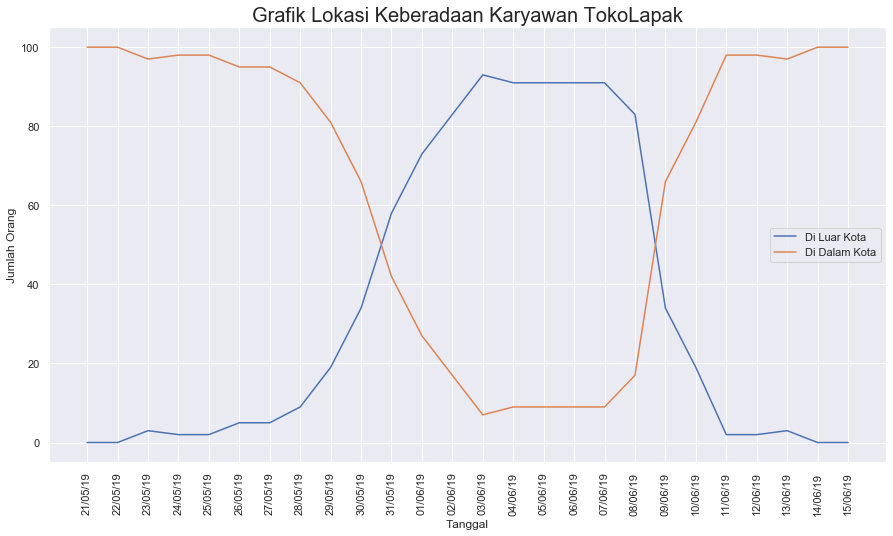

In [76]:
fig, ax = plt.subplots(1,1, figsize= (15,8))
ax.plot(data_jumlah["Tanggal"], data_jumlah['Jumlah Di Luar Kota'], label = 'Di Luar Kota')
ax.plot(data_jumlah["Tanggal"], data_jumlah['Jumlah Di Dalam Kota'], label = 'Di Dalam Kota')
plt.xticks(rotation=90)
plt.legend(loc='best')

plt.title('Grafik Lokasi Keberadaan Karyawan TokoLapak', fontsize = '20')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Orang')

plt.show()


## Kesimpulan 

- TokoLapak memiliki 100 karyawan dimana terdapat 68 karyawan laki-laki dan 32 karyawan perempuan.
- Karyawan TokoLapak tersebar di wilayah JABODETABEK.
- TokoLapak memiliki karyawan dengan usia termuda 21 tahun, tertua 35 tahun dan rata-rata usia karyawan TokoLapak 27 tahun.
- Usia termuda karyawan yang bekerja di TokoLapak terdapat pada divisi software engineer, business intelligence , dan data science sedangkan usia tertua karyawan TokoLapak berada hampir disetiap divisi kecuali pada divisi software engineer.
- Berdasarkan grafik keberadaan karyawan TokoLapak, sejak awal periode, trend karyawan yang menuju ke luar kota naik hingga mencapai titik tertinggi pada tanggal 03 juni 2019, hal ini diasumsikan bahwa karyawan TokoLapak melakukan kegiatan mudik pada periode 30 Mei 2019 hingga 08 Juni 2019.